![](img/base-topo.png)

# Animais para Adoção | Web Scrapping e Análise de Dados

O abandono de animais é um grande problema que muitas ongs e protetores enfrentam diariamente. Segundo uma pesquisa realizada pelo [Instituto Pet Brasil](http://institutopetbrasil.com/imprensa/pais-tem-39-milhoes-de-animais-em-condicao-de-vulnerabilidade/) cerca de 3,9 milhões de pets (incluindo gatos e cachorros) se encontram em situação de vulnerabilidade, onde vivem sob tutela de famílias classificadas abaixo da linha da pobreza ou que vivem nas ruas.  

Em uma tentativa de fazer a diferença na vida de animais nessas situações, algumas inciativas tais como [Procure 1 Amigo](https://www.procure1amigo.com.br/), [Amigo não se compra](https://www.amigonaosecompra.com.br/) e o [Caoviver](https://www.caoviver.com.br/) disponibilizam informações sobre bichinhos que se encontram disponíveis para adoção, seja sob tutela de ONGs ou de protetores.  

Neste projeto, será analisado alguns dados coletados via web scrapping do site [Amigo não se compra](https://www.amigonaosecompra.com.br/) que contém dados de animais já adotados e disponíveis para adoção.

![](img/dog.jpg)

## Índice do Projeto

## Obtenção dos Dados

Os dados foram obtidos por meio de um web scrapping realizado no site Amigo Não se Compra, está disponível no diretório desse projeto no arquivo **scrapper.ipynb**.

In [1]:
# importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurações
sns.set_style("darkgrid")

# importando os dados para um dataframe
df = pd.read_csv("dados.csv")

In [2]:
# verificando as primeiras entradas para validar importação
df.head()

,Unnamed: 0,nome,cidade,estado,data,especie,sexo,porte,qtd_visitas,adotado
0,0,Heloisa Salino,Rio de Janeiro,Rio de Janeiro,22/08/2020.,Gato,Fêmea,Pequeno,4,0
1,1,Snoopy,Rio de Janeiro,Rio de Janeiro,22/08/2020.,Cachorro,Macho,Médio,21,0
2,2,Mila,Rio de Janeiro,Rio de Janeiro,22/08/2020.,Cachorro,Fêmea,Pequeno,23,0
3,3,Free,São Paulo,São Paulo,22/08/2020.,Cachorro,Macho,Médio,30,0
4,4,Valentina,São Paulo,São Paulo,22/08/2020.,Gato,Fêmea,Pequeno,54,0


## Pré-processamento dos dados

### Dicionário de Variáveis

**nome**: nome do bichinho  
**cidade**: cidade onde está localizado  
**estado**: estado onde está localizado  
**data**: data da publicação do anúncio  
**especie**: espécie do bichinho, entre gato e cachorro    
**sexo**: sexo do bichinho, entre fêmea e macho  
**porte**: porte do bichinho, entre pequeno, médio e grande  
**qtd_visitas**: quantidade de visitas ao anúncio até o momento que a extração dos dados foi realizada  
**adotado**: variável binária se foi adotado ou não (0: não, 1: sim)  

### Quantidade de entradas e variáveis

In [3]:
print("Este dataframe contém {} entradas e {} variáveis.".format(df.shape[0], df.shape[1]))

Este dataframe contém 12033 entradas e 10 variáveis.


### Tipo das variáveis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12033 entries, 0 to 12032
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   12033 non-null  int64 
 1   nome         12033 non-null  object
 2   cidade       12033 non-null  object
 3   estado       12033 non-null  object
 4   data         12033 non-null  object
 5   especie      12033 non-null  object
 6   sexo         12033 non-null  object
 7   porte        12033 non-null  object
 8   qtd_visitas  12033 non-null  int64 
 9   adotado      12033 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 940.2+ KB


A partir desse método, podemos ver que não há valores nulos no dataset. Com isso, não será necessária a validação no momento.  

### Validação da presença de outliers

In [5]:
df.describe()

,Unnamed: 0,qtd_visitas,adotado
count,12033.000000,12033.000000,12033.000000
mean,3007.772625,451.158232,0.501371
std,1736.925286,667.387460,0.500019
min,0.000000,4.000000,0.000000
25%,1504.000000,179.000000,0.000000
50%,3008.000000,318.000000,1.000000
75%,4512.000000,530.000000,1.000000
max,6032.000000,33427.000000,1.000000


In [6]:
df[df['qtd_visitas'] > 1500].count()

Unnamed: 0     355
nome           355
cidade         355
estado         355
data           355
especie        355
sexo           355
porte          355
qtd_visitas    355
adotado        355
dtype: int64

Segundo os dados presentes no método describe, o valor máximo da variável `qtd_visitas` é de 33427. Como a maior parte do nosso dataset está em até 530 visitas, será necessária uma limpeza desses outliers.

### Tratando outliers

Como verificado acima, nosso dataset possuia alguns valores que são realistas levando em consideração a quantidade de visitas porém pode apresentar valores alterados em comparação aos outros que são menores.

In [7]:
df_clean = df.drop(df[df['qtd_visitas'] > 1500].index)

In [8]:
df_clean.describe()

,Unnamed: 0,qtd_visitas,adotado
count,11678.000000,11678.000000,11678.000000
mean,2985.505737,383.455129,0.502997
std,1734.652743,283.809259,0.500012
min,0.000000,4.000000,0.000000
25%,1485.000000,175.000000,0.000000
50%,2973.500000,310.000000,1.000000
75%,4484.000000,503.000000,1.000000
max,6032.000000,1499.000000,1.000000


Ao realizar uma nova descrição do nosso dataset, os valores de quantidade de visitas vão até 1499.

In [9]:
df = df_clean.copy()

### Tratamento da variável data
Para posteriormente realizar análises com base nos dias, meses ou anos, iremos configurar a coluna de datas para que possamos iterar os dados.

In [10]:
df['data'] = df['data'].str.replace('.', '')

In [11]:
df['data'] = df['data'].str.replace(' ', '')

In [12]:
df['data'] = pd.to_datetime(df['data'], infer_datetime_format=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11678 entries, 0 to 12032
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   11678 non-null  int64         
 1   nome         11678 non-null  object        
 2   cidade       11678 non-null  object        
 3   estado       11678 non-null  object        
 4   data         11678 non-null  datetime64[ns]
 5   especie      11678 non-null  object        
 6   sexo         11678 non-null  object        
 7   porte        11678 non-null  object        
 8   qtd_visitas  11678 non-null  int64         
 9   adotado      11678 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1003.6+ KB


### Deletando colunas desnecessárias
Ao carregar o dataset, foi criado uma coluna chama 'Unnamed'. Como ela não será necessária nesse projeto, iremos retira-la.

In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.head()

,nome,cidade,estado,data,especie,sexo,porte,qtd_visitas,adotado
0,Heloisa Salino,Rio de Janeiro,Rio de Janeiro,2020-08-22,Gato,Fêmea,Pequeno,4,0
1,Snoopy,Rio de Janeiro,Rio de Janeiro,2020-08-22,Cachorro,Macho,Médio,21,0
2,Mila,Rio de Janeiro,Rio de Janeiro,2020-08-22,Cachorro,Fêmea,Pequeno,23,0
3,Free,São Paulo,São Paulo,2020-08-22,Cachorro,Macho,Médio,30,0
4,Valentina,São Paulo,São Paulo,2020-08-22,Gato,Fêmea,Pequeno,54,0


## Análise dos Dados
 
Nesta etapa, iremos analisar os dados e com base nas análises verificar algumas questões como:

*- Quais as características da maioria dos animais para adoção?*  
*- Como estão divididas as características por espécies?*  
*- Qual espécie tem maior probabilidade de ser adotada e qual a mais presente nos dados?*  

Anotações:  
- Em qual estado mais tem animais disponíveis para adoção  
- Como estão distribuidos esses animais nos estados com mais animais para adoção  



### 1. Quais as características dos animais disponíveis para a adoção?

Como até mencionado na pesquisa do [Instituto Pet Brasil]('http://institutopetbrasil.com/imprensa/pais-tem-39-milhoes-de-animais-em-condicao-de-vulnerabilidade/'), a maioria dos animais para adoção são **cachorros**.  

A maioria dos animais são de porte **pequeno** e **médio**.  

Há uma certa equivalência quando visualizamos o sexo e por um pouco mais, a maioria dos animais são **fêmeas**, o que levanta também a importância da castração nos animais, para que números de animais em situação de vulnerabilidade não cresçam.

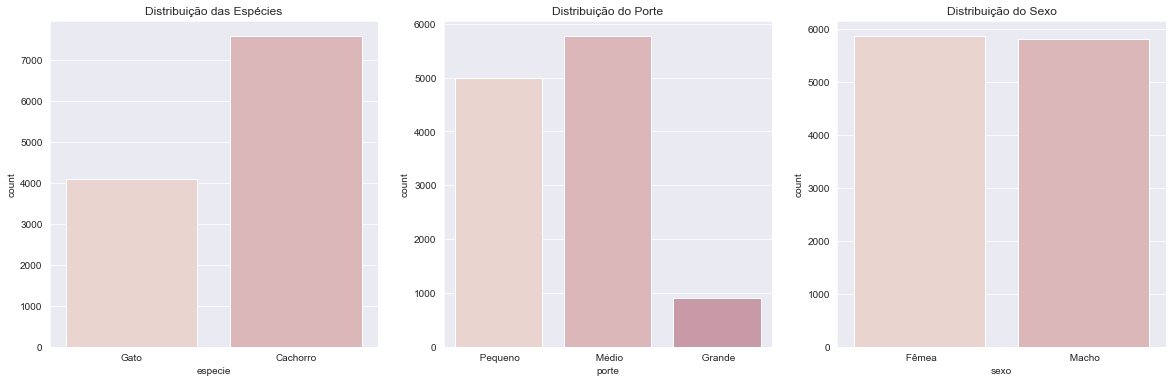

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(20,6))
sns.countplot(x="especie", data=df, palette=sns.cubehelix_palette(8), ax=ax[0]).set_title('Distribuição das Espécies');
sns.countplot(x="porte", data=df,  palette=sns.cubehelix_palette(8),ax=ax[1]).set_title('Distribuição do Porte');
sns.countplot(x="sexo", data=df, palette=sns.cubehelix_palette(8), ax=ax[2]).set_title('Distribuição do Sexo');

Como podemos ver no gráfico da distribuição da variável `especie`, os cachorros são quase o dobro dos gatos e esse desbalanceamento pode causar alguma alteração nas nossas análises.  
Antes de continuar, iremos igualar a quantidade de dados de gatos e de cachorros.

In [17]:
# backup dataframe antigo
df_antigo = df.copy()

# separando os dados para análises separadas
gatos = df[df['especie'] == 'Gato']
cachorros = df[df['especie'] == 'Cachorro'].sample(gatos.shape[0])

# juntando os dados e recriando o dataframe
df = pd.concat([gatos,cachorros])

In [18]:
print("Valores do dataframe original:")
df_antigo['especie'].value_counts()

Valores do dataframe original:


Cachorro    7588
Gato        4090
Name: especie, dtype: int64

In [19]:
print("Valores do novo dataframe:")
df['especie'].value_counts()

Valores do novo dataframe:


Gato        4090
Cachorro    4090
Name: especie, dtype: int64

### 2. Como estão divididas as características por espécies?

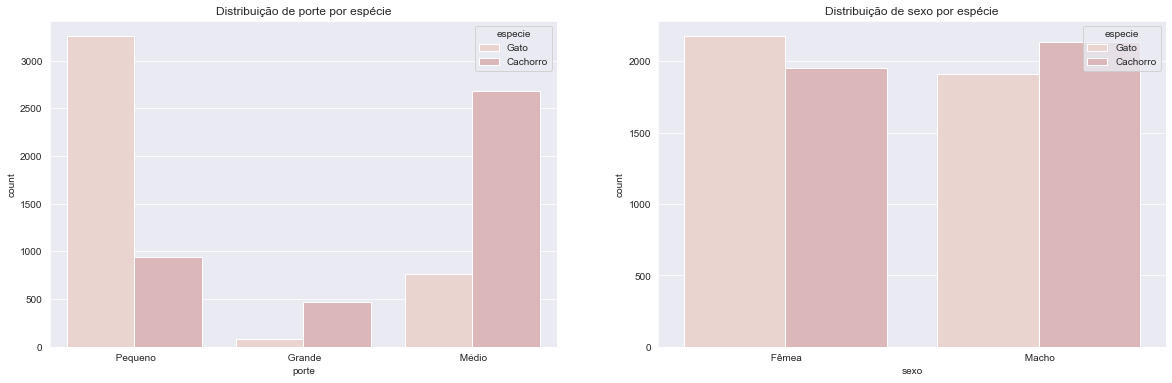

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
sns.countplot(x="porte", hue="especie", data=df, palette=sns.cubehelix_palette(8), ax=ax[0]).set_title('Distribuição de porte por espécie');
sns.countplot(x="sexo", hue="especie", data=df, palette=sns.cubehelix_palette(8), ax=ax[1]).set_title('Distribuição de sexo por espécie');

### 3. Qual espécie tem maior probabilidade de ser adotada?

Os gatos possuem mais casos de adoção do que cachorros. Fatores podem ser analisados nesse caso para poder identificar os motivos para que isso aconteça.

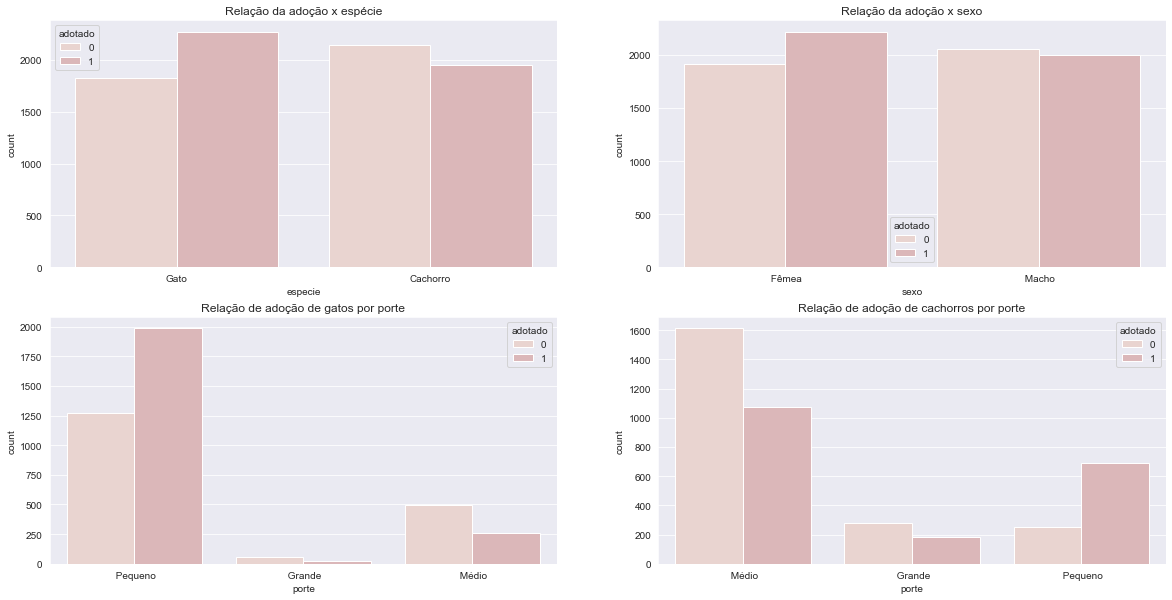

In [21]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
sns.countplot(x="especie", hue="adotado", data=df, palette=sns.cubehelix_palette(8), ax=ax[0,0]).set_title("Relação da adoção x espécie");
sns.countplot(x="sexo", hue="adotado", data=df, palette=sns.cubehelix_palette(8), ax=ax[0,1]).set_title("Relação da adoção x sexo");
sns.countplot(x="porte", hue="adotado", data=gatos,  palette=sns.cubehelix_palette(8), ax=ax[1,0]).set_title("Relação de adoção de gatos por porte");
sns.countplot(x="porte", hue="adotado", data=cachorros, palette=sns.cubehelix_palette(8), ax=ax[1,1]).set_title("Relação de adoção de cachorros por porte");

... construção